### **Dataset Link: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews**

## **Apply BagOfWords**

You can also apply TF-IDF in the same way

In [2]:
# If you use google colab then at first install this packages

!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
import contractions

### Load the dataset

Here, I just take 25,000 or 50% data from the enitre dataset.
The reason of this, if I take full dataset then it will take much more time to train and preprocessing of the data. So, I just take 50% data for train model quickly.

In [4]:
all_data = pd.read_csv("/content/drive/MyDrive/Machine Learning/NLP/Project/Movie Sentiment Analysis/datasets/IMDB Dataset.csv")

In [5]:
df = all_data.iloc[:10000]

In [6]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## **Do some EDA**

In [7]:
df.shape

(10000, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [9]:
# Check null values

df.isna().sum()

review       0
sentiment    0
dtype: int64

In [10]:
# number of positive and negative class
df['sentiment'].value_counts()

positive    5028
negative    4972
Name: sentiment, dtype: int64

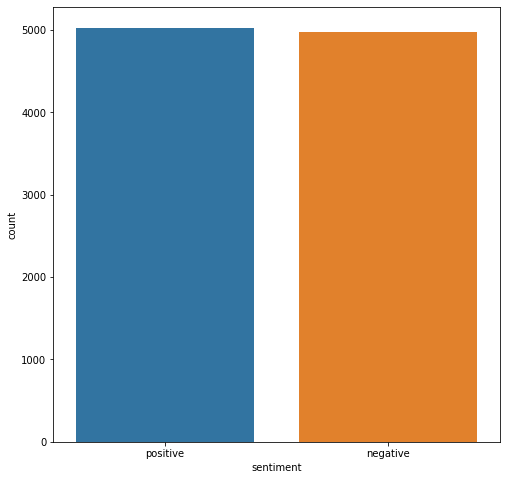

In [11]:
# See the dataset is balance or not

plt.figure(figsize=(8,8))
sns.countplot(x='sentiment', data=df)
plt.show()

In [12]:
# Check the duplicated rows exists or not

df.duplicated().sum()

17

In [13]:
# Drop the duplicate rows

df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [14]:
# Now check the shape

df.shape

(9983, 2)

In [15]:
# Now check the duplicate rows

df.duplicated().sum()

0

## **Apply Text preprocessing**

In [16]:
df.loc[0, 'review']

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [17]:
df.loc[5, 'review']

'Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it\'s not preachy or boring. It just never gets old, despite my having seen it some 15 or more times in the last 25 years. Paul Lukas\' performance brings tears to my eyes, and Bette Davis, in one of her very few truly sympathetic roles, is a delight. The kids are, as grandma says, more like "dressed-up midgets" than children, but that only makes them more fun to watch. And the mother\'s slow awakening to what\'s happening in the world and under her own roof is believable and startling. If I had a dozen thumbs, they\'d all be "up" for this movie.'

In [18]:
df.loc[5000, 'review']

'"Transylvania 6-5000" is an insignificant but occasionally funny and charming mid 80\'s horror parody with some very familiar names in the cast and a handful of genuine opportunities to chuckle in the script. Two bozo journalist of a gossipy tabloid newspaper are sent, very much against their will, to Transylvania to do a story on the alleged return of mad scientist Frankenstein. There are some adorable little gimmicks and details to discover left and right in the film, like a little guillotine for hard-boiled eggs and laboratory test tubes that are being used to put in cream and sugar at the breakfast table. The wholesome of the film, however, is not as successful as it could and should have been, with jokes and parody situations that are way too overlong. The Roger Corman production "Transylvania Twist", which came out four years after this, is a lot funnier and much more recommended. The film is particularly parodying the classic Universal milestones of the early 30\'s, so you bett

In [19]:
# Demo test
x = "alaminbhuyan321@gmail.com!!!"

print(x.translate(str.maketrans('', '', string.punctuation)))
print(type(x.translate(str.maketrans('', '', string.punctuation))))

# Demo test end

alaminbhuyan321gmailcom
<class 'str'>


### **Handeling contractions words**

In [20]:
# Demo test

print(contractions.fix(s="I'm a student"))

contractions.add(key="Iam", value="I am")

print(contractions.fix(s="yall"))
print(contractions.fix(s="Iam"))

# Demo test end

I am a student
you all
I Am


In [21]:
# Handeling contractions words

def expand_contractions_words(text):
    text = contractions.fix(s=text)
    return text

In [22]:
# Demo test
expand_contractions_words("""i thought this movie was really really great! \
Helena did an amazing job in it! I thought she played her character very well! \
she's an AWESOME actress!! :)<br /><br />the movie was also really funny too! \
The jokes were great! i couldnt stop laughing! :)<br /><br />i think everyone should see it... :)<br /><br />""")

# Demo test end

'i thought this movie was really really great! Helena did an amazing job in it! I thought she played her character very well! she is an AWESOME actress!! :)<br /><br />the movie was also really funny too! The jokes were great! i could not stop laughing! :)<br /><br />i think everyone should see it... :)<br /><br />'

In [23]:
df['review'] = df['review'].apply(func=expand_contractions_words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df.loc[0, 'review']

'One of the other reviewers has mentioned that after watching just 1 Oz episode you will be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Them City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to th

In [25]:
# Remove HTML tags and punctuation and digits

def clean_text(text):
    # make text lower case
    text = text.lower()
    # remove html tags
    text = re.sub(pattern=r"<.*?>", repl="", string=text)
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # remove digits
    text = re.sub(pattern=r"\d+", repl=" ", string=text)
    # remove white space
    text = " ".join(text.split())

    return text

In [26]:
df['review'] = df['review'].apply(func=clean_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df.loc[0, 'review']

'one of the other reviewers has mentioned that after watching just oz episode you will be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda them city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows would not dare forget pretty p

In [28]:
df.loc[5000, 'review']

'transylvania is an insignificant but occasionally funny and charming mid s horror parody with some very familiar names in the cast and a handful of genuine opportunities to chuckle in the script two bozo journalist of a gossipy tabloid newspaper are sent very much against their will to transylvania to do a story on the alleged return of mad scientist frankenstein there are some adorable little gimmicks and details to discover left and right in the film like a little guillotine for hardboiled eggs and laboratory test tubes that are being used to put in cream and sugar at the breakfast table the wholesome of the film however is not as successful as it could and should have been with jokes and parody situations that are way too overlong the roger corman production transylvania twist which came out four years after this is a lot funnier and much more recommended the film is particularly parodying the classic universal milestones of the early s so you better make sure you have seen those i

In [29]:
# If you use google colab then use this line
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
# Remove stopwords and apply stemming
ps = PorterStemmer()

def clean_text2(text):
    words = word_tokenize(text=text)
    words = [ps.stem(word=word) for word in words if word not in stopwords.words("english")]
    text = " ".join(words)

    return text

In [31]:
# demo test 

clean_text2("""i thought this movie was really really great helena did an amazing job in it i \
thought she played her character very well she is an awesome actress \
the movie was also really funny too the jokes were great i could not stop laughing i think everyone should see it""")

# demo test end

'thought movi realli realli great helena amaz job thought play charact well awesom actress movi also realli funni joke great could stop laugh think everyon see'

In [32]:
# Apply on review column for entire dataset

df['review'] = df['review'].apply(func=clean_text2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
df.loc[1, 'review']

'wonder littl product film techniqu unassum oldtimebbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done'

## **Split the independent and dependent variable**

In [34]:
X = df.loc[:, 'review']
y = df['sentiment']

In [35]:
X.head()

0    one review mention watch oz episod hook right ...
1    wonder littl product film techniqu unassum old...
2    thought wonder way spend time hot summer weeke...
3    basic famili littl boy jake think zombi closet...
4    petter mattei love time money visual stun film...
Name: review, dtype: object

In [36]:
X.shape

(9983,)

In [37]:
y.head()

0    positive
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object

In [38]:
y.shape

(9983,)

In [39]:
# Encode the dependent variable

encoder = LabelEncoder()

In [40]:
y = encoder.fit_transform(y=y)

In [41]:
y

array([1, 1, 1, ..., 0, 0, 1])

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [43]:
x_train.shape, y_train.shape

((7986,), (7986,))

In [44]:
x_train

7314    alright start offic shrink appar good one main...
4871    georg cukor women remain one glitter gem holly...
8543    cellar intoler dull overli childfriendli chees...
1696    saw move pari may debat mission impossiblei gl...
537     motocross fun great guess understand lot motoc...
                              ...                        
1099    idea behind movi great stori littl girl face a...
2514    defin scene movi fat guy quitsbut evil doctor ...
6637    first anyon think sequel william friedkin fren...
2575    let us kid atroc plan nine cat women bad perio...
7336    like jami foxxalvin sandersd hell love act guy...
Name: review, Length: 7986, dtype: object

In [45]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [46]:
x_test.shape, y_test.shape

((1997,), (1997,))

In [47]:
x_test

4920    readili admit watch lot realli bad movi think ...
2726    lie tell affair year old bucktooth femal stude...
3690    movi underr polic acadmey mission moscow movi ...
3379    david lynch new short lynchian piec full dark ...
3336    movi chang life hogan perform noth short incre...
                              ...                        
9295    canadian filmmak ron switzer deliv solid nonst...
4773    dvd bare minut long dull interview reveal aver...
524     deni affin speed movi like fast furiou dhoom r...
4693    small pleasur life walk old movi aisl rental s...
4296    saw movi first came love sinc search video nev...
Name: review, Length: 1997, dtype: object

In [48]:
# Apply BagOfWords or CounterVectorizer

cv = CountVectorizer(max_features=5000) # I reduce the vocabulary size for training purpose




# We can also apply bi-grams or n-grams like this

# cv = CountVectorizer(max_features=5000, ngram_range=(1,3))

# cv = CountVectorizer(ngram_range=(1,3))

In [49]:
x_train_bow = cv.fit_transform(raw_documents=x_train).toarray()
x_test_bow = cv.transform(raw_documents=x_test).toarray()

In [50]:
x_train_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [51]:
x_train_bow.shape

# here total number of columns 52859 means total vocabulary
# here total number of rows 7986 means total document
# (7986, 52859)

(7986, 5000)

In [52]:
cv.get_feature_names_out()

array(['aaron', 'abandon', 'abbott', ..., 'zombi', 'zone', 'zoom'],
      dtype=object)

In [53]:
type(cv.vocabulary_)

dict

In [54]:
# Total vocabulary

len(cv.vocabulary_)

5000

In [55]:
cv.vocabulary_

{'alright': 131,
 'start': 4215,
 'offic': 3102,
 'shrink': 4001,
 'appar': 201,
 'good': 1926,
 'one': 3118,
 'main': 2699,
 'hero': 2084,
 'first': 1697,
 'jack': 2365,
 'frost': 1809,
 'random': 3543,
 'rhyme': 3712,
 'brother': 557,
 'yell': 4981,
 'turn': 4630,
 'anyway': 194,
 'back': 313,
 'crappi': 1002,
 'movieth': 2931,
 'phone': 3279,
 'let': 2575,
 'secretari': 3895,
 'friend': 1801,
 'listen': 2614,
 'heroic': 2085,
 'insan': 2290,
 'sheriff': 3973,
 'suppos': 4356,
 'movi': 2927,
 'look': 2640,
 'noth': 3060,
 'like': 2599,
 'laugh': 2527,
 'poor': 3348,
 'peopl': 3248,
 'dig': 1228,
 'lab': 2500,
 'type': 4640,
 'doctor': 1290,
 'quit': 3518,
 'see': 3901,
 'anyth': 192,
 'poke': 3335,
 'killer': 2472,
 'mutant': 2953,
 'heat': 2064,
 'shock': 3982,
 'ad': 47,
 'strang': 4263,
 'bizarr': 439,
 'whole': 4893,
 'nine': 3028,
 'yard': 4974,
 'give': 1897,
 'leav': 2550,
 'fish': 1701,
 'tank': 4414,
 'coffe': 838,
 'top': 4552,
 'walk': 4818,
 'clean': 796,
 'stuff': 4291,


## **Train model**

In [56]:
# Apply MultinomialNB

mnb = MultinomialNB()

In [57]:
mnb.fit(X=x_train_bow, y=y_train)

MultinomialNB()

In [58]:
y_predict = mnb.predict(X=x_test_bow)
y_predict

array([0, 0, 0, ..., 0, 1, 1])

In [59]:
y_test

array([0, 0, 0, ..., 0, 1, 1])

In [60]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_predict)

In [61]:
accuracy

0.8457686529794692

In [62]:
confusion_matrix(y_true=y_test, y_pred=y_predict)

array([[851, 146],
       [162, 838]])

In [63]:
# Apply Random forest Classifier

rf = RandomForestClassifier()

In [64]:
rf.fit(X=x_train_bow, y=y_train)

RandomForestClassifier()

In [65]:
y_predict2 = mnb.predict(X=x_test_bow)
y_predict2

array([0, 0, 0, ..., 0, 1, 1])

In [66]:
y_test

array([0, 0, 0, ..., 0, 1, 1])

In [67]:
accuracy2 = accuracy_score(y_true=y_test, y_pred=y_predict2)
accuracy2

0.8457686529794692

In [68]:
confusion_matrix(y_true=y_test, y_pred=y_predict2)

array([[851, 146],
       [162, 838]])